In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


In [3]:
##Create/view notch filter
samp_freq,notch_freq,quality_factor=map(int,input().split())        ##Sample frequency (Hz),Frequency to be removed from signal (Hz),Quality factor

1000 50 20


In [4]:
##Design a notch filter using signal.iirnotch
b_notch, a_notch =signal.iirnotch(notch_freq,quality_factor,samp_freq)

In [5]:
##Compute magnitude response of the designed filter
freq, h =signal.freqz(b_notch,a_notch,fs=samp_freq)

In [6]:
##Plot the response of the filter
fig = plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

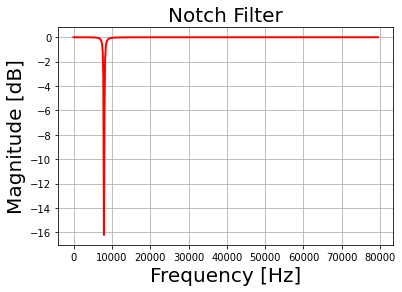

In [7]:
##Plot magnitude response of the filter
plt.plot(freq*samp_freq/(2*np.pi),20 * np.log10(abs(h)),'r', label='Bandpass filter', linewidth='2' )
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Magnitude [dB]', fontsize=20)
plt.title('Notch Filter', fontsize=20)
plt.grid()

In [8]:
##Create and view signal that is a mixture of two different frequencies
f1 = 15         ##Frequency of 1st signal in Hz
f2 = 50         ##Frequency of 2nd signal in Hz
##Set time vector
n =np.linspace(0,1,1000)           ##Generate 1000 sample sequence in 1 sec


In [9]:
##Generate the signal containing f1 and f2
noisySignal =np.sin(2*np.pi*15*n) +np.sin(2*np.pi*50*n)+np.random.normal(0,.1,1000)*0.03 

Text(0.5, 1.0, 'Noisy Signal')

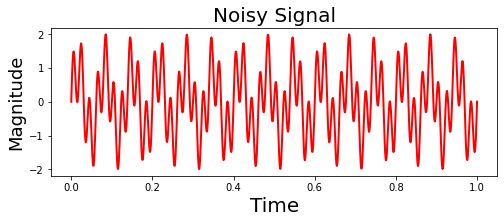

In [11]:
##Plotting
fig = plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(n, noisySignal, color = 'r', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude' , fontsize=18)
plt.title('Noisy Signal', fontsize=20)


In [12]:
##Apply notch filter to the noisy signal using signal.filtfilt
outputSignal =signal.filtfilt(b_notch,a_notch,noisySignal)

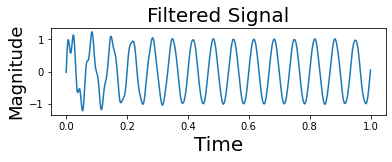

In [13]:
##Plot notch-filtered version of signal
plt.subplot(212)

##Plot output signal of notch filter
plt.plot(n,outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude' , fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()